In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('../data/database.db')

# Loan

In [3]:
df = pd.read_sql_query('SELECT * FROM loanDev', con)
df.head()

,id,accountId,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1


* Categorical: id, accountId
* Dates: date, duration
* Numerical: amount

In [4]:
df.describe()

,id,accountId,amount,duration,payments,status
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,6205.658537,5982.085366,145308.621951,35.853659,4150.932927,0.719512
std,667.985675,3213.262492,105247.318098,16.734752,2193.620989,0.695541
min,4959.000000,2.000000,4980.000000,12.000000,319.000000,-1.000000
25%,5604.250000,3079.000000,68328.000000,24.000000,2368.750000,1.000000
50%,6227.500000,6032.000000,114804.000000,36.000000,3878.500000,1.000000
75%,6737.250000,8564.500000,198600.000000,48.000000,5907.750000,1.000000
max,7308.000000,11362.000000,538500.000000,60.000000,9689.000000,1.000000


status: Mean e std tendem para 1, provavelmente 1 significa que o empréstimo foi pago.

In [5]:
print(f"Unique duration values: {df['duration'].unique()}")
print(f"Unique ids: {df['id'].unique().size}")
print(f"Unique accountIds: {df['accountId'].unique().size}")

Unique duration values: [12 36 60 24 48]
Unique ids: 328
Unique accountIds: 328


<AxesSubplot:>

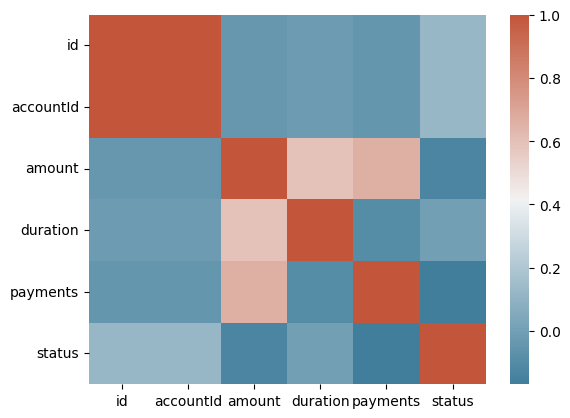

In [6]:
sns.heatmap(df.corr(), cmap=sns.diverging_palette(230, 20, as_cmap=True))

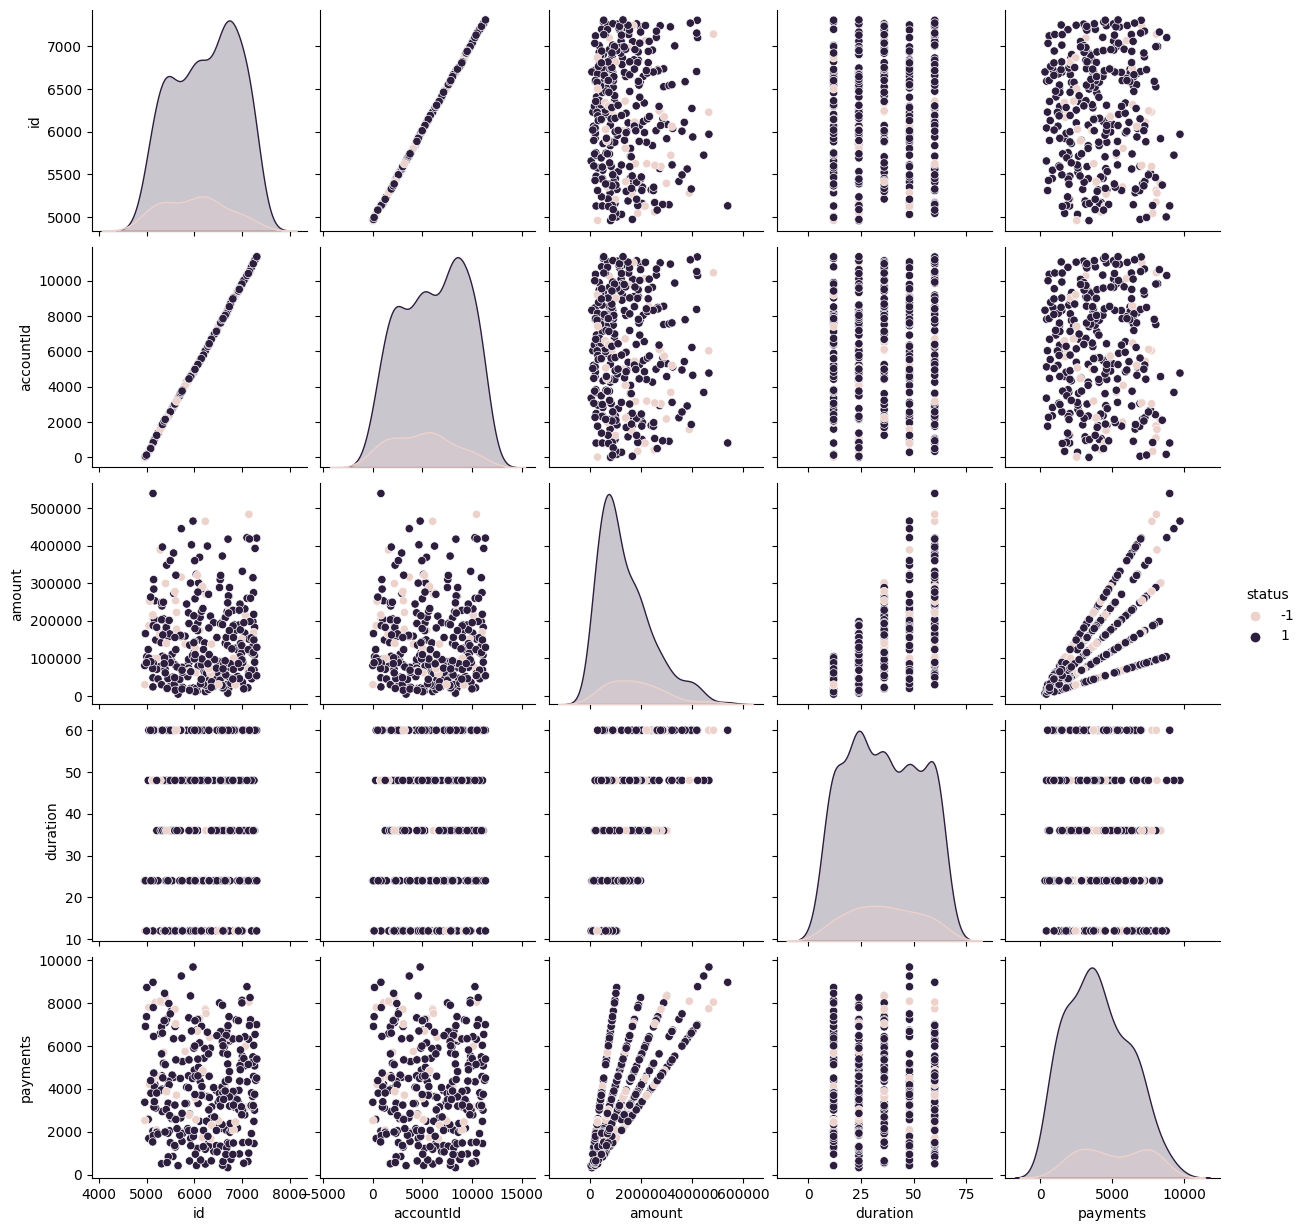

In [7]:
sns.pairplot(data=df, hue="status")

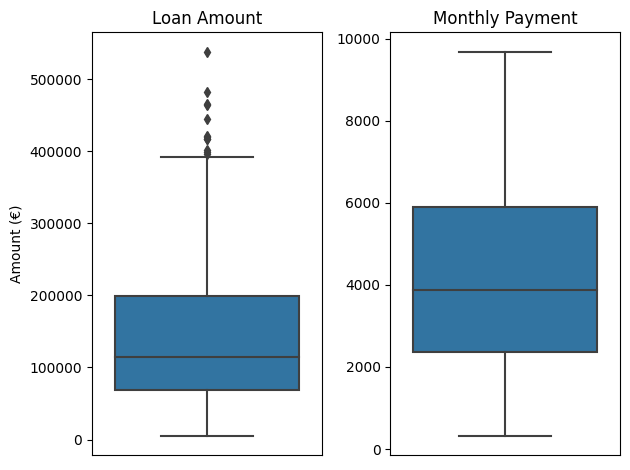

In [8]:
fig, ax = plt.subplots(1,2)

sns.boxplot(df['amount'], ax=ax[0])
ax[0].set_title("Loan Amount")
ax[0].set_xticklabels([])
ax[0].set_xticks([])
ax[0].set_ylabel('Amount (€)')

sns.boxplot(df['payments'], ax=ax[1])
ax[1].set_title("Monthly Payment")
ax[1].set_xticklabels([])
ax[1].set_xticks([])

fig.tight_layout()

In [9]:
df['monthlyPayment'] = df['amount']/df['duration']
df.head()

,id,accountId,date,amount,duration,payments,status,monthlyPayment
0,5314,1787,930705,96396,12,8033,-1,8033.0
1,5316,1801,930711,165960,36,4610,1,4610.0
2,6863,9188,930728,127080,60,2118,1,2118.0
3,5325,1843,930803,105804,36,2939,1,2939.0
4,7240,11013,930906,274740,60,4579,1,4579.0


<AxesSubplot:xlabel='duration', ylabel='count'>

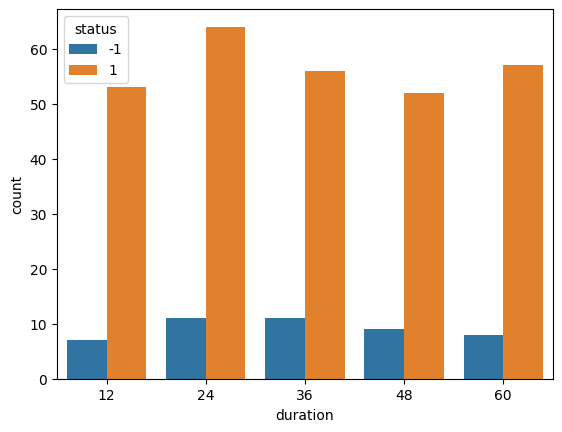

In [11]:
sns.countplot(df, x='duration', hue='status')

In [12]:
df['year'] = df['date'].transform(lambda x : x[:2])
df['month'] = df['date'].transform(lambda x: x[2:4])
df['yearMonth'] = df['date'].transform(lambda x : x[:4])
df.head()

,id,accountId,date,amount,duration,payments,status,monthlyPayment,year,month,yearMonth
0,5314,1787,930705,96396,12,8033,-1,8033.0,93,07,9307
1,5316,1801,930711,165960,36,4610,1,4610.0,93,07,9307
2,6863,9188,930728,127080,60,2118,1,2118.0,93,07,9307
3,5325,1843,930803,105804,36,2939,1,2939.0,93,08,9308
4,7240,11013,930906,274740,60,4579,1,4579.0,93,09,9309


<AxesSubplot:xlabel='yearMonth', ylabel='count'>

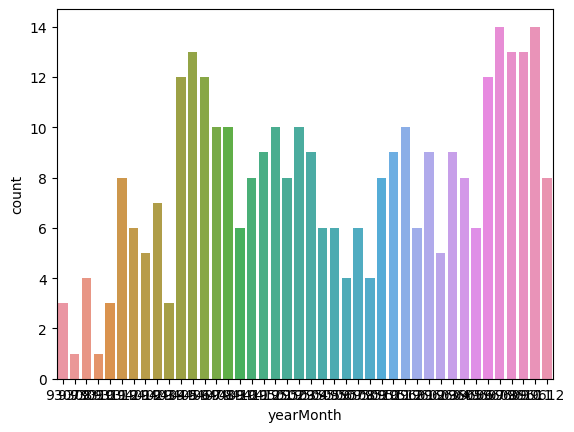

In [13]:
sns.countplot(df, x='yearMonth')

<AxesSubplot:xlabel='year', ylabel='count'>

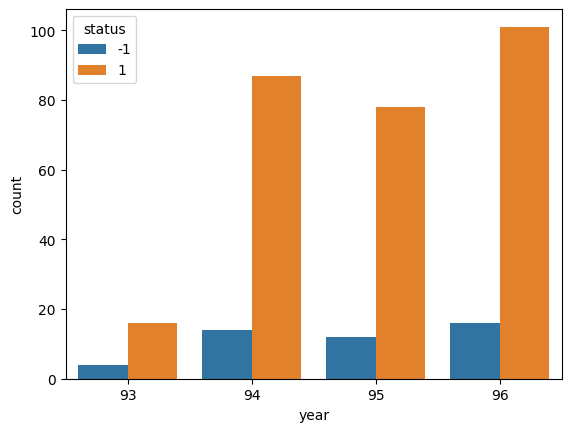

In [14]:
df['year'] = df['date'].apply(lambda x: x[:2])
sns.countplot(df, x='year', hue='status')

<AxesSubplot:xlabel='month', ylabel='count'>

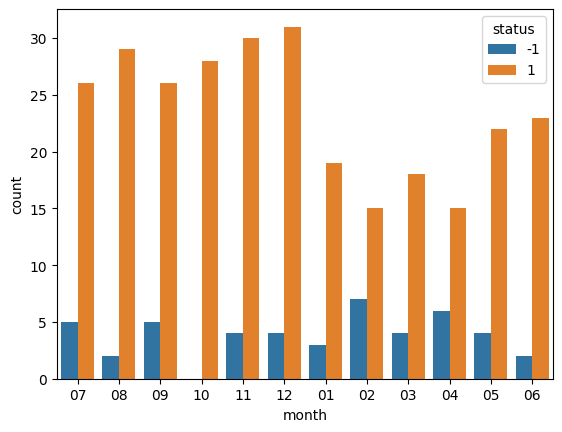

In [15]:
sns.countplot(df, x='month', hue='status')

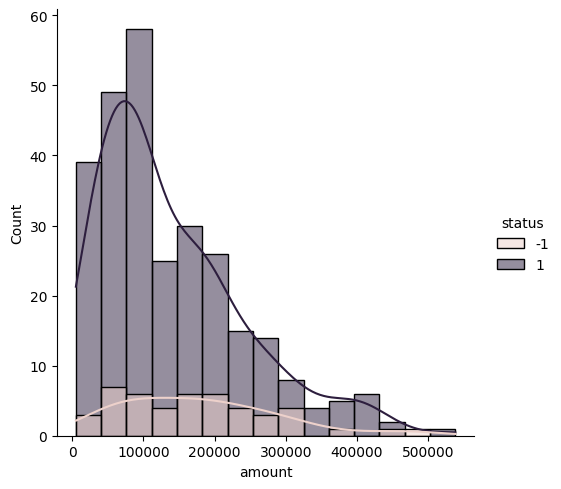

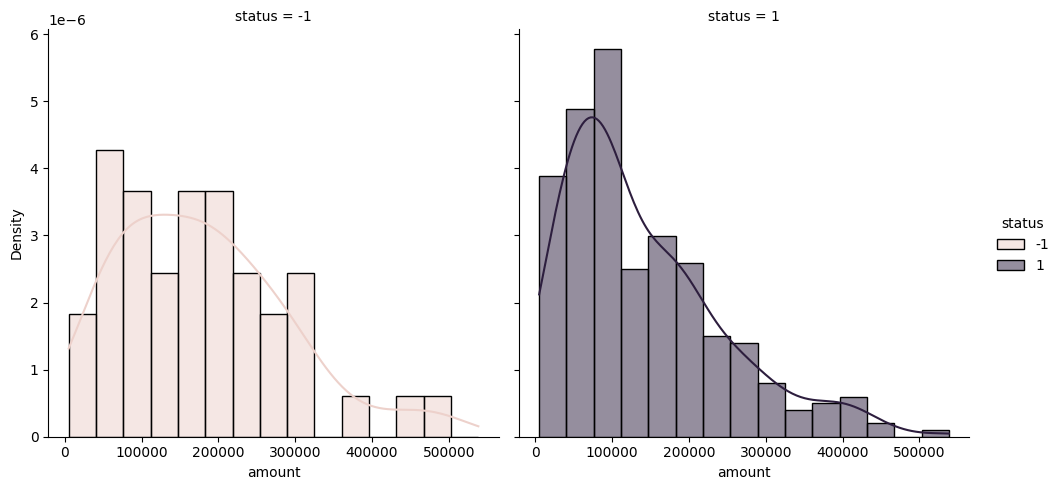

In [16]:
sns.displot(df, x='amount', hue='status', kde=True)
sns.displot(df, x='amount', hue='status', stat='density', col='status', common_norm=False, kde=True)

In [17]:
import datetime
def date_to_timestamp(date):
    Y = int("19" + date[:2])
    M = int(date[2:4])
    D = int(date[4:])
    return datetime.datetime(Y,M,D, 0, 0).timestamp()

df['timestamp'] = df['date'].apply(date_to_timestamp)
df.head()

,id,accountId,date,amount,duration,payments,status,monthlyPayment,year,month,yearMonth,timestamp
0,5314,1787,930705,96396,12,8033,-1,8033.0,93,07,9307,741823200.0
1,5316,1801,930711,165960,36,4610,1,4610.0,93,07,9307,742341600.0
2,6863,9188,930728,127080,60,2118,1,2118.0,93,07,9307,743810400.0
3,5325,1843,930803,105804,36,2939,1,2939.0,93,08,9308,744328800.0
4,7240,11013,930906,274740,60,4579,1,4579.0,93,09,9309,747266400.0


([<matplotlib.axis.XTick at 0x7f983d0799f0>,
 [Text(725842800.0, 0, '93'),
  Text(757378800.0, 0, '94'),
  Text(788914800.0, 0, '95'),
  Text(820450800.0, 0, '96'),
  Text(852076800.0, 0, '97')])

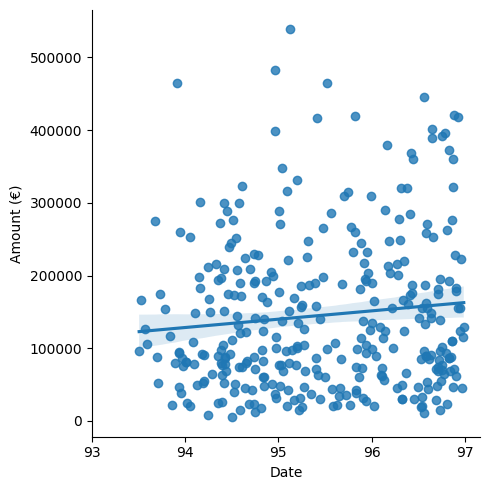

In [18]:
sns.lmplot(data=df, x='timestamp', y='amount')
plt.ylabel('Amount (€)')
plt.xlabel('Date')

years = [datetime.datetime(1993+i, 1, 1, 0, 0).timestamp() for i in range(0,5)]
plt.xticks(ticks=years,labels=[93, 94, 95, 96, 97])


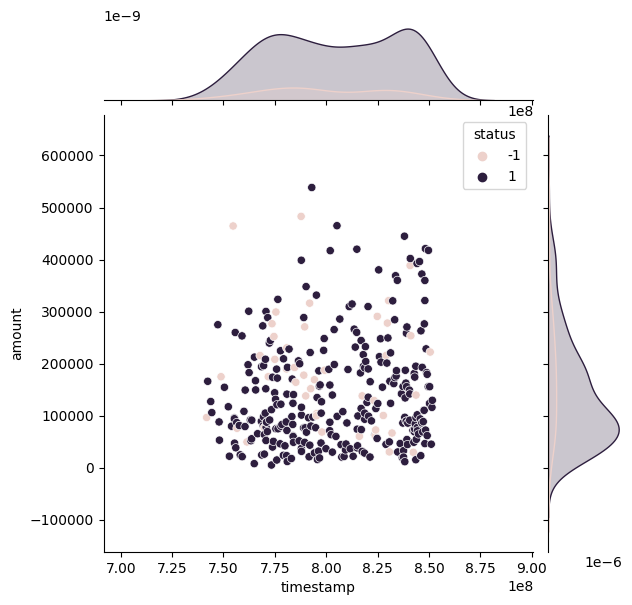

In [19]:
sns.jointplot(data=df, x="timestamp", y="amount", hue="status", cmap=sns.color_palette("Set2"))